# Objective

- Use a business dataset to formulate conclusions
- Create visual representations of data collected through data wrangling and data filtration
- Interpret datasets using data retrieval techniques to collect them

# Problem Area

When users look for a place to stay, they may look for Airbnb's or hotels. In this case, I will be looking at the dataset regarding New York City's Airbnb Options. Through data retrieval techniques, I will provide information regarding a house's rental price and its area. I will also look at the Airbnb properties of the Airbnb hosts.



By collecting this information, both customers and hosts can benefit from this. Customers can use this data to filter a location that is most cost-effective for them, providing them with informaed decisions on where to stay. They will also be able to see which host offers locations all year round and whihc do not. Hosts, on the other hand, can see which locations yield the highest return for their money.


These fings are part of Airbnb's public dataset.

# Understanding the Dataset

The dataset I will be looking at can be found through Kaggle's collection of datasets. (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

This dataset involves an official release of New York City's Airbnb open data from 2019 taken directly from the Airbnb website.

I will be looking primarily at the **price, host name, neighborhood, and availability.**

Understanding rental price trends will provide valuable information to the hosts and guests by filtering information such as cost and area to those interested in the Airbnb market.

# Queries

By answering and plotting these equeries, I will provide an analysis of how each query can be interpreted.

1. Top 3 neighborhoods that have the highest average nightly rental price
2. Top 3 neighborhoods that have the lowest average nightly rental price
3. Top 10 hosts who have the lowest nightly rental price
4. List the name's of 10 hosts who have had at least one of their Airbnb listings available to rent all year
5. List the name's of 10 hosts who have had at least one of their Airbnb listings not available to rent all year
6. Top 10 hosts who have the highest nightly rental price

I will begin by first importing the required libraries used for retrieving and plotting data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Next, I will obtain the Airbnb dataset located in my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/AB_NYC_2019.csv")

# Pre-Processing/Data Cleaning

Since I only need to work with the columns pertaining to host name, neighborhouud, price, and availablility. I will only focus on those by gathering the element number correlated to their respective columns. This will provide me of a subset of the relevant data.

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
relevantData = data.iloc[:,[3, 5, 9, 15]].copy()
relevantData

,host_name,neighbourhood,price,availability_365
0,John,Kensington,149,365
1,Jennifer,Midtown,225,355
2,Elisabeth,Harlem,150,365
3,LisaRoxanne,Clinton Hill,89,194
4,Laura,East Harlem,80,0
...,...,...,...,...
48890,Sabrina,Bedford-Stuyvesant,70,9
48891,Marisol,Bushwick,40,36
48892,Ilgar & Aysel,Harlem,115,27
48893,Taz,Hell's Kitchen,55,2


Here I check for any null values in my relevant data using .isnull() and drop any null values I find after locating which column is associated with the null values.

In [ ]:
relevantData.isnull().sum()

host_name           21
neighbourhood        0
price                0
availability_365     0
dtype: int64

In [ ]:
relevantData.dropna(how = 'all', subset = ['host_name'],inplace = True)
relevantData.isnull().sum()

host_name           0
neighbourhood       0
price               0
availability_365    0
dtype: int64

After dropping null values, I also delete any duplicate rows that can provide inconsistencies in the data processing process.

In [ ]:
relevantData.duplicated().sum()

895

In [ ]:
relevantData.drop_duplicates(inplace = True)
relevantData.duplicated().sum()

0

To see what type of information the Airbnb dataset provides me with, I will print then data types for each column in the relevant data table I have created.

In [ ]:
relevantData.dtypes

host_name           object
neighbourhood       object
price                int64
availability_365     int64
dtype: object

Since the average price corresponding to the neighborhood will be used in future queries, I will add a column of average rental prices in addition to the data I have previously sliced.

In [ ]:
neighborhood_avg_price = relevantData.groupby('neighbourhood')['price'].transform('mean')
relevantData['avg_price'] = neighborhood_avg_price
relevantData

,host_name,neighbourhood,price,availability_365,avg_price
0,John,Kensington,149,365,93.195402
1,Jennifer,Midtown,225,355,274.896480
2,Elisabeth,Harlem,150,365,119.500764
3,LisaRoxanne,Clinton Hill,89,194,181.391228
4,Laura,East Harlem,80,0,133.812500
...,...,...,...,...,...
48890,Sabrina,Bedford-Stuyvesant,70,9,108.525130
48891,Marisol,Bushwick,40,36,85.446013
48892,Ilgar & Aysel,Harlem,115,27,119.500764
48893,Taz,Hell's Kitchen,55,2,203.776596


# 1. Top 3 neighborhoods that have the highest average nightly rental price

Using sort_values(), I will obtain the average price and order the dataset by descending order to gather the average prices starting from the highest to lowest.

By using drop_duplicates(), I will drop any duplicates of the same neighborhood to gather the top 3 neighborhoods instead of the top 3 average prices only since there can be multiple Airbnb's in one neighborhood.

The use of .head(3) will gather the top 3 results of the table.

In [ ]:
top_3_neighborhoods_avg = relevantData.sort_values(by = 'avg_price', ascending = False).drop_duplicates(subset = 'neighbourhood').head(3)
top_3_neighborhoods_avg

,host_name,neighbourhood,price,availability_365,avg_price
25386,Mark,Fort Wadsworth,800,365,800.000000
3049,Donna,Woodrow,700,0,700.000000
46252,Ej,Tribeca,600,80,493.028409


By creating a bar graph, we can plot the top 3 neighborhoods associated with the highest average nightly rental price and see the price associated with it.

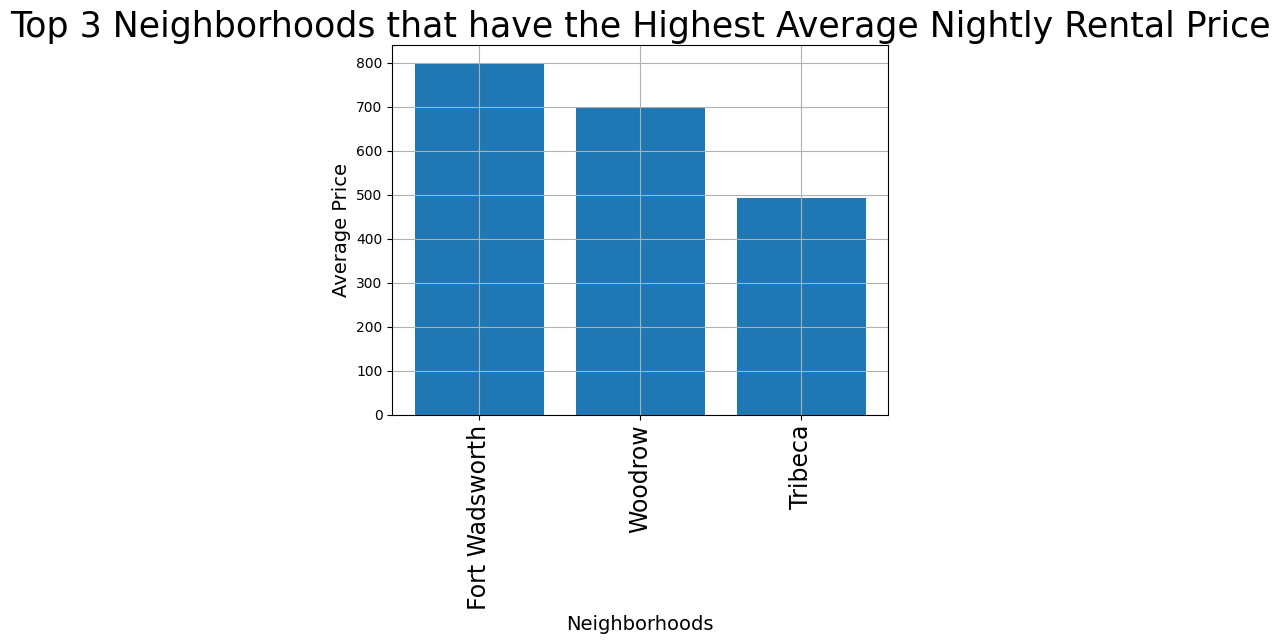

In [ ]:
avgPrice = top_3_neighborhoods_avg['avg_price']
neighborhoods = list(top_3_neighborhoods_avg['neighbourhood'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(neighborhoods, avgPrice)

plt.xlabel('Neighborhoods', fontsize = 14)
plt.ylabel('Average Price', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 17)
plt.title('Top 3 Neighborhoods that have the Highest Average Nightly Rental Price', fontsize = 25)

ax.grid()
plt.show()

For Airbnb customers, these neighborhoods may be areas that customers may want to deter from. For hosts, these neighborhoods may be areas to purchase properties to sell for rental.

# 2. Top 3 neighborhoods that have the lowest average nightly rental price

In the code snippet below, the average price is sorted this time without stating ascending to be false. This will make ascending true by default, and the drop_duplicates() is implemented to remove the same neighborhood in case another row has a duplicate. Since we want to see the top 3 neighborhoods and not lowest average nightly rental price only, it is necessary.

.head() is used to obtain the top 3.

In [ ]:
top_3_neighborhoods_lowest_avg = relevantData.sort_values(by = 'avg_price').drop_duplicates(subset = 'neighbourhood').head(3)
top_3_neighborhoods_lowest_avg

,host_name,neighbourhood,price,availability_365,avg_price
37044,Xiomara,Bull's Head,80,362,47.333333
29591,Schomberg,Hunts Point,45,0,50.500000
22708,Emma,Tremont,38,327,51.545455


This code block plots the top 3 neighborhoods with the least average nightly rental price.

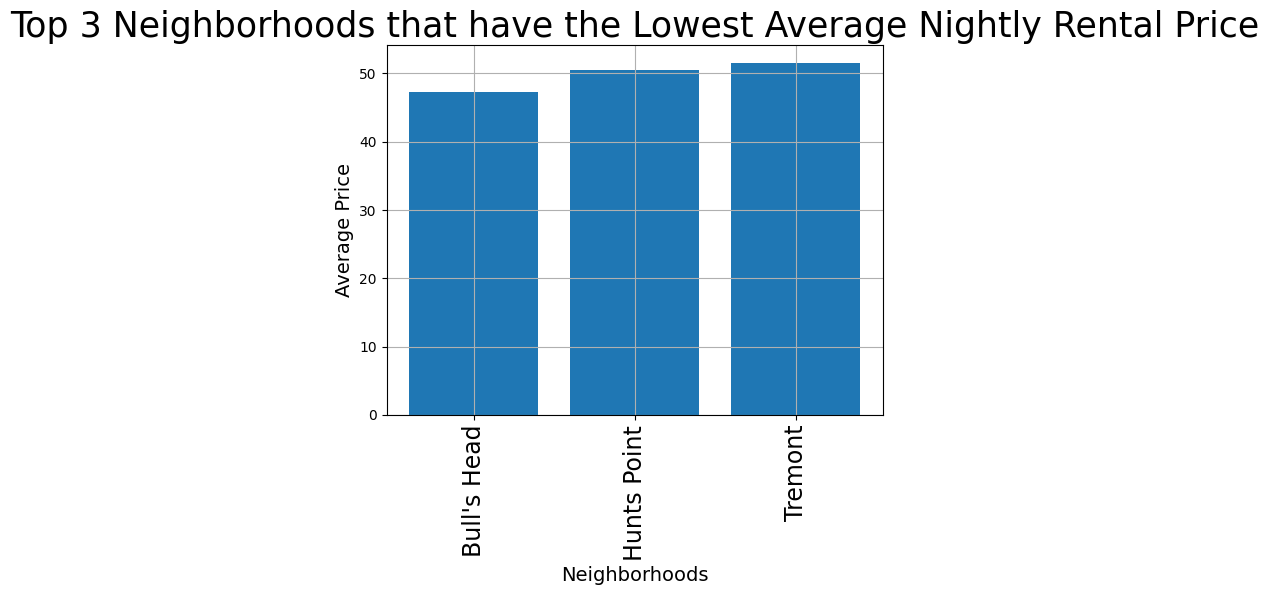

In [ ]:
avgPrice = top_3_neighborhoods_lowest_avg['avg_price']
neighborhoods = list(top_3_neighborhoods_lowest_avg['neighbourhood'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(neighborhoods, avgPrice)

plt.xlabel('Neighborhoods', fontsize = 14)
plt.ylabel('Average Price', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 17)
plt.title('Top 3 Neighborhoods that have the Lowest Average Nightly Rental Price', fontsize = 25)

ax.grid()
plt.show()

For Airbnb customers, these neighborhoods may be areas that customers may be attracted to sinec they are more cost-effective. For hosts, these neighborhoods may be areas to deter away from since they yield lower rental prices.

# 3. Top 10 hosts who have the lowest nightly rental price

I collect the top 10 expensive nightly rental prices here by sorting the table by its price in ascending order. I then drop any duplicates of the host name in case a host has multiple properties of the cheapest prices.

I then use .head(10) to output the top 10 hosts who have the lowest nightly rental price.

In [ ]:
top_10_host = relevantData.sort_values(by='price').drop_duplicates(subset = 'host_name').head(10)
top_10_host

,host_name,neighbourhood,price,availability_365,avg_price
26259,Qiuchi,Murray Hill,0,0,224.182018
25753,Lauren,Greenpoint,0,0,143.850788
26866,Sergii,Bushwick,0,139,85.446013
25778,Aymeric,Williamsburg,0,73,144.659802
25794,Adeyemi,Bedford-Stuyvesant,0,176,108.525130
23161,Kimberly,Bedford-Stuyvesant,0,28,108.525130
25433,Anisha,East Morrisania,0,127,85.000000
25634,Martial Loft,Bushwick,0,0,85.446013
47218,Julio,Bushwick,10,0,85.446013
27972,Vishanti & Jeremy,Greenpoint,10,32,143.850788


In the code snippet below, I output the result in a bar chart where the top 10 hosts who have the lowest nightly rental price are shown with their corresponding price.

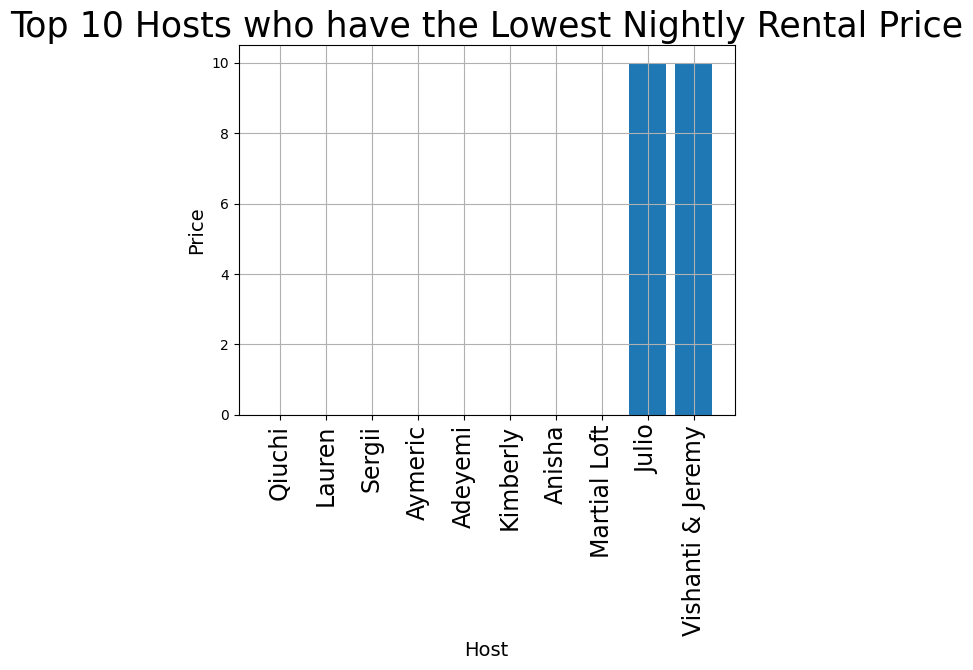

In [ ]:
price = top_10_host['price']
host = list(top_10_host['host_name'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(host, price)

plt.xlabel('Host', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 17)
plt.title('Top 10 Hosts who have the Lowest Nightly Rental Price', fontsize = 25)

ax.grid()
plt.show()

As shown in the bar chart, the prices and hosts are given for the lowest prices. For customers, this can be used as a filter to look at any other listings the host may have since they have cost-effective prices. For hosts, this can help bring business to them since they will stand out as having cheaper properties.

# 4. List the name's of 10 hosts who have had at least one of their Airbnb listings available to rent every day of the year.

In the code snippet, I use the relevantData table I created to look for the number '365' in the availability_365 column. By setting this condition in place, the table will output only rows with that condition being met, which indicates that the Airbnb listning has been available to rent every day. I drop duplicates of the host name since every row must have a unique host name.

Since order is not relevant here, I will not be sorting by ascending or descending.

I then use .head(10) to return 10 rows the table outputted.

In [ ]:
all_year_availablity = relevantData[relevantData['availability_365'] == 365].drop_duplicates(subset = 'host_name').head(10)
all_year_availablity

,host_name,neighbourhood,price,availability_365,avg_price
0,John,Kensington,149,365,93.195402
2,Elisabeth,Harlem,150,365,119.500764
36,Vt,Bedford-Stuyvesant,35,365,108.525130
38,Harriet,Flatbush,150,365,92.321370
97,Elliott,Harlem,89,365,119.500764
139,Sahr,Clinton Hill,135,365,181.391228
164,Sylvia,Upper East Side,250,365,189.402715
181,Mark,Ridgewood,350,365,77.654589
196,Jullett,Jamaica,55,365,94.740909
204,Douglas,Harlem,200,365,119.500764


The code snippet below shwos a bar graph of the hosts who had their listing available to rent 365 days of the year.

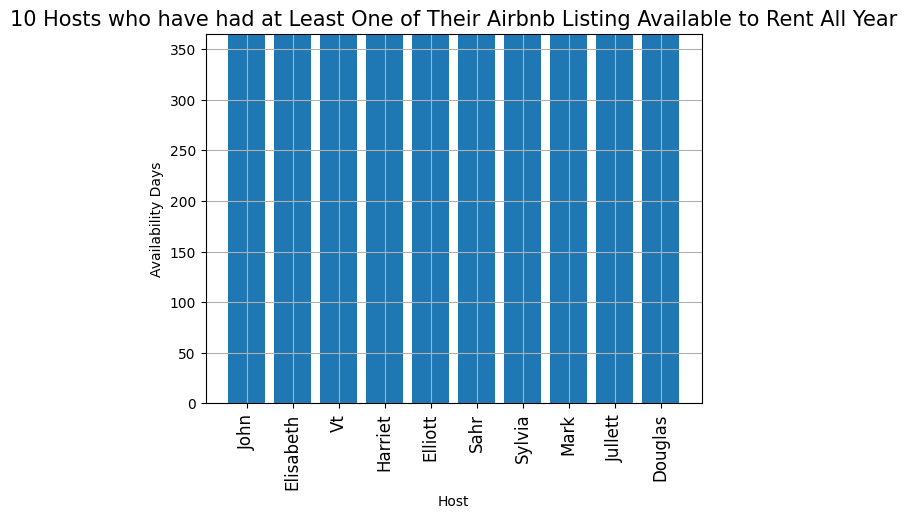

In [ ]:
availability = all_year_availablity['availability_365']
host = list(all_year_availablity['host_name'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(host, availability)

plt.xlabel('Host', fontsize = 10)
plt.ylabel('Availability Days', fontsize = 10)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title('10 Hosts who have had at Least One of Their Airbnb Listing Available to Rent All Year', fontsize = 15)

plt.ylim(0,365)

ax.grid()
plt.show()

From the bar graph, you can see at least 10 hosts who have had their listing available 365 days of the year. Customers can use this infromation to see which listings are not in high demand. They may also use it to filter out for available listings, so this will narrow their search and lead to a better experience. Hosts may benefit from this since it will bring attention to customers who are looking for a low demand listing, and potentionally cheaper rental price.


# 5. List the name's of 10 hosts who have had at least one of their Airbnb listings not available to rent all year.


In the code snippet, I use the relevantData table I created to look for the number '0' in the availability_365 column. By setting this condition in place, the table will output only rows with that condition being met, which indicates that the Airbnb has not been available to rent at all in one year. I drop duplicates of the host name since every row must have a unique host name.

Since order is not relevant here, I will not be sorting by ascending or descending.

I then use .head(10) to return 10 rows the table outputted.

In [ ]:
no_availability = relevantData[relevantData['availability_365'] == 0].drop_duplicates(subset = 'host_name').head(10)
no_availability

,host_name,neighbourhood,price,availability_365,avg_price
4,Laura,East Harlem,80,0,133.812500
6,Garon,Bedford-Stuyvesant,60,0,108.525130
8,MaryEllen,Upper West Side,79,0,209.478619
14,Alina,West Village,120,0,268.448231
20,Chaya,Williamsburg,299,0,144.659802
26,Claude & Sophie,Inwood,80,0,88.898785
48,Jennifer,Bedford-Stuyvesant,115,0,108.525130
66,Sara,Park Slope,225,0,176.542574
88,Pas,East Village,50,0,186.730811
94,Christiana,Williamsburg,100,0,144.659802


The code snippet below shwos a bar graph of the hosts who had their listing available to rent 0 days of the year.

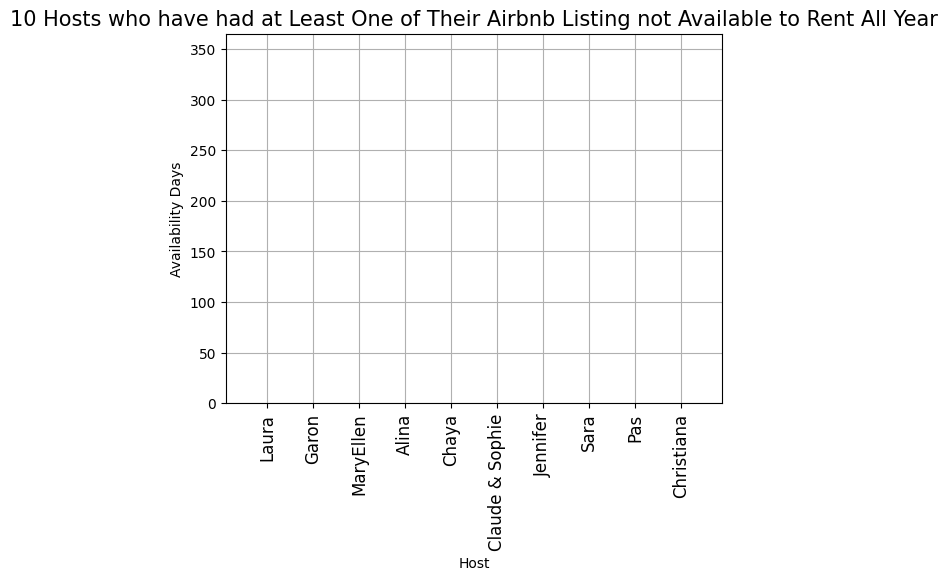

In [ ]:
availability = no_availability['availability_365']
host = list(no_availability['host_name'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(host, availability)

plt.xlabel('Host', fontsize = 10)
plt.ylabel('Availability Days', fontsize = 10)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title('10 Hosts who have had at Least One of Their Airbnb Listing not Available to Rent All Year', fontsize = 15)

plt.ylim(0,365)

ax.grid()
plt.show()

From the bar graph, you can see at least 10 hosts who have had their listing available 365 days of the year. Customers can use this infromation to see which listings are in high demand. They may also use it to filter out any Airbnb's that are not available, so this will narrow their search and lead to a better experience. Customers may also take note of how high demand a certain Airbnb is, which may lead to them booking it earlier. Hosts may benefit from this since they will be able to see their competition and see what a successful Airbnb looks like.

# 6. Top 10 hosts who have the highest nightly rental price

The code sorts values by price in a descending order by setting ascending = false. It also drops duplicates since every host name should be unique.

.head(10) is used to grab the top 10 hosts.

In [ ]:
top_10_host = relevantData.sort_values(by='price', ascending=False).drop_duplicates(subset = 'host_name').head(10)
top_10_host

,host_name,neighbourhood,price,availability_365,avg_price
9151,Kathrine,Astoria,10000,0,117.495536
29238,Jelena,Upper West Side,10000,83,209.478619
17692,Erin,Greenpoint,10000,0,143.850788
40433,Matt,Lower East Side,9999,365,188.828090
6530,Olson,East Harlem,9999,0,133.812500
12342,Amy,Lower East Side,9999,83,188.828090
30268,Rum,Tribeca,8500,251,493.028409
4377,Jessica,Clinton Hill,8000,365,181.391228
29662,Sally,Upper East Side,7703,146,189.402715
45666,Sandra,East Flatbush,7500,179,104.881391


The code snippet below graphs the top 10 hosts who have the highest nightly rental price in a bar chart.

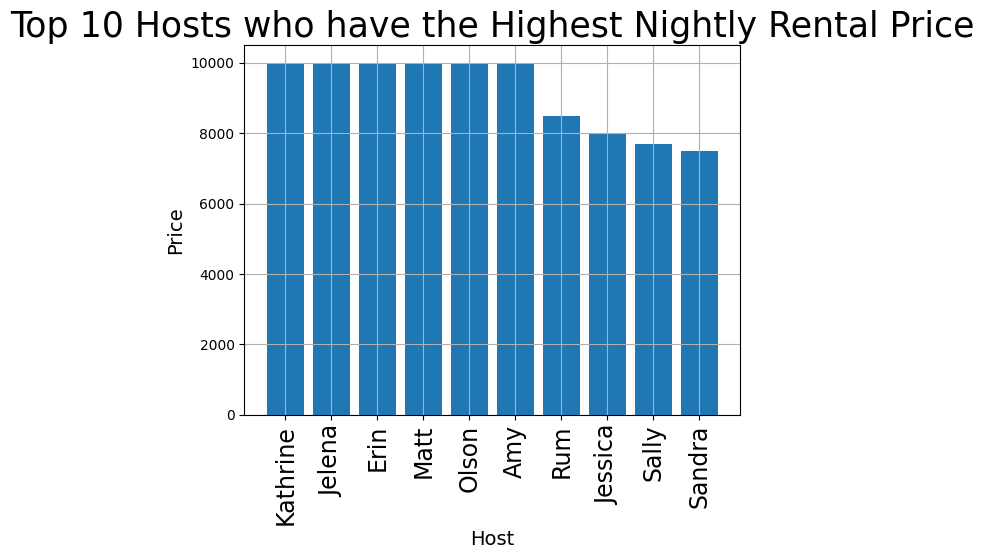

In [ ]:
price = top_10_host['price']
host = list(top_10_host['host_name'])

fig,ax = plt.subplots(nrows = 1, ncols = 1)

ax.bar(host, price)

plt.xlabel('Host', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 17)
plt.title('Top 10 Hosts who have the Highest Nightly Rental Price', fontsize = 25)

ax.grid()
plt.show()

Customers can use this bar chart to see which hosts to potentionally avoid or look at if they seek a potentionally luxurious place to rent. Hosts can benefit from this because they can see what an expensive Airbnb entails and see their competition in that price area.

# Conclusion

Overall, by analyzing the New York City's Airbnb dataset, we can provide valuable insights on how customers and benefits can benefit from them. Customers can use the information as a way to filter their needs such as sorting by cheaper or expensive rentals. They will be able to filter which neighborhoods yield a higher price on average, and which yield a smaller price. They will also be able to see which Airbnb's are usually more readily available, which may affect their booking date.

Hosts on the Airbnb website hosting rental properties in New York City may also benefit because they also gain valuable insights. Hosts can see which locations yield high-return results when it comes to money. By seeing which locations are more expensive or cheaper on average, they may adjust their pricing accordingly to stay competitive with their fellow hosts.

By plotting these results, I was able to provide the results visually to make it easier to understand the results and identify any trends.
